<a href="https://colab.research.google.com/github/anacarolcarrascoconsultorias-lab/IBM-Data-Science-Assignments/blob/main/Lab_22_Stacked_Charts_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-12-09 09:37:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  44.8MB/s    in 3.9s    

2025-12-09 09:37:34 (38.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


#**TASK 0: DATA CLEANING AND PREPPING**

In [7]:
# Columns that matter for this stacked charts lab
cols = [
    'Age',
    'Employment',
    'JobSatPoints_6',
    'JobSatPoints_7',
    'ConvertedCompYearly',
    'LanguageAdmired',
    'PlatformAdmired'
]

print(">>> dtypes of key columns")
print(df[cols].dtypes)

print("\n>>> Age - top values")
print(df['Age'].value_counts().head(15))

print("\n>>> Employment - top values")
print(df['Employment'].value_counts().head(15))

print("\n>>> JobSatPoints_6 & JobSatPoints_7 - summary")
print(df[['JobSatPoints_6', 'JobSatPoints_7']].describe())

print("\n>>> ConvertedCompYearly - summary (watch the crazy big ones)")
print(df['ConvertedCompYearly'].describe())

print("\n>>> LanguageAdmired - sample (multi-select)")
print(df['LanguageAdmired'].dropna().head(10))

print("\n>>> PlatformAdmired - sample (multi-select)")
print(df['PlatformAdmired'].dropna().head(10))


>>> dtypes of key columns
Age                     object
Employment              object
JobSatPoints_6         float64
JobSatPoints_7         float64
ConvertedCompYearly    float64
LanguageAdmired         object
PlatformAdmired         object
dtype: object

>>> Age - top values
Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

>>> Employment - top values
Employment
Employed, full-time                                                         39041
Independent contractor, freelancer, or self-employed                         4846
Student, full-time                                                           4709
Employed, full-time;Independent contractor, freelancer, or self-employed     3557
Not employed, but looking for work                                           2341
Employed, part-ti

In [8]:
import pandas as pd
import numpy as np

# -----------------------------
# 1. Ordered Age Categories
# -----------------------------
age_order = [
    "Under 18 years old",
    "18-24 years old",
    "25-34 years old",
    "35-44 years old",
    "45-54 years old",
    "55-64 years old",
    "65 years or older",
    "Prefer not to say"
]

def order_age_column(df, col="Age"):
    """Convert Age column to an ordered categorical variable."""
    df[col] = pd.Categorical(df[col], categories=age_order, ordered=True)
    return df


# -----------------------------
# 2. Multi-select explode function
# -----------------------------
def explode_multiselect(df, column, separator=";"):
    """
    Splits a multi-select column into multiple rows.
    Example: 'Python;SQL' → two rows.
    """
    df_clean = df.copy()
    df_clean = df_clean.dropna(subset=[column])
    df_clean[column] = df_clean[column].str.split(separator)
    df_clean = df_clean.explode(column)
    df_clean[column] = df_clean[column].str.strip()
    return df_clean


# -----------------------------
# 3. Compensation cleaning (IQR)
# -----------------------------
def clean_compensation(df, col="ConvertedCompYearly"):
    """
    Removes extreme outliers from compensation using the IQR rule.
    Keeps values within Q1 - 1.5*IQR and Q3 + 1.5*IQR.
    """
    df_clean = df.copy()
    q1 = df_clean[col].quantile(0.25)
    q3 = df_clean[col].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr

    df_clean = df_clean[df_clean[col] <= upper]
    return df_clean


# -----------------------------
# 4. Helper: compute medians by age (for stacked charts)
# -----------------------------
def median_by_age(df, cols):
    """
    Computes median values by ordered age group.
    cols = list of numeric columns
    """
    tmp = df.groupby("Age")[cols].median()
    tmp = tmp.loc[age_order]  # ensures correct visual order
    return tmp


In [10]:
df2 = order_age_column(df.copy())
df_comp = clean_compensation(df2)
test = median_by_age(df_comp, ["JobSatPoints_6", "JobSatPoints_7"])
test


/tmp/ipython-input-1144224908.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = df.groupby("Age")[cols].median()


,JobSatPoints_6,JobSatPoints_7
Age,,
Under 18 years old,10.0,5.0
18-24 years old,20.0,20.0
25-34 years old,20.0,15.0
35-44 years old,20.0,15.0
45-54 years old,20.0,15.0
55-64 years old,20.0,20.0
65 years or older,22.5,15.0
Prefer not to say,10.0,20.0


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



/tmp/ipython-input-1144224908.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = df.groupby("Age")[cols].median()


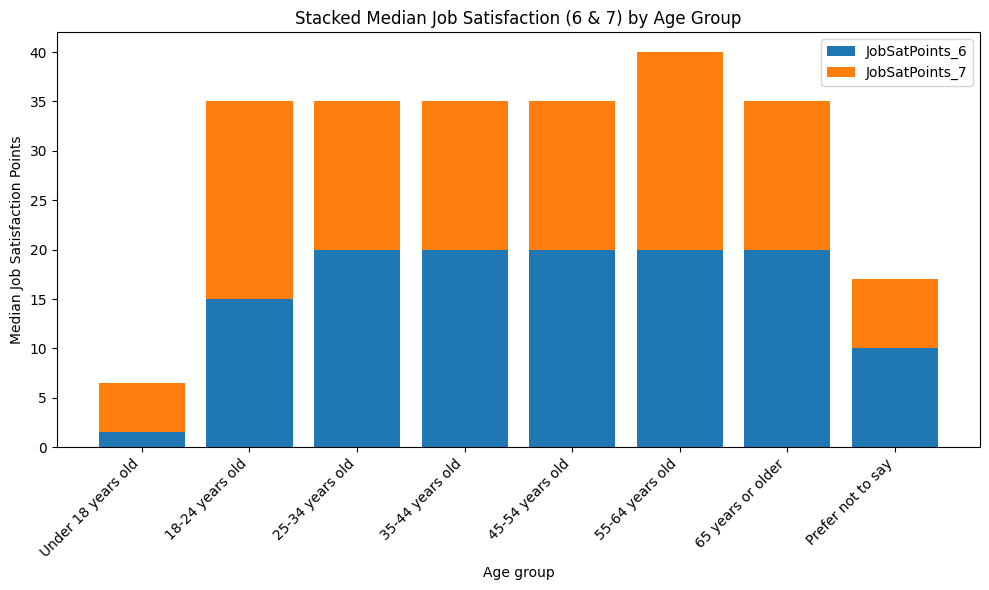

In [11]:
##Write your code here
# --- Task 1.1: Stacked Job Satisfaction by Age Group ---

# Make sure Age is ordered
df_age = order_age_column(df.copy())

# Compute median job satisfaction per age group
job_sat_by_age = median_by_age(df_age, ["JobSatPoints_6", "JobSatPoints_7"])

# Drop age groups that might be completely NaN (just in case)
job_sat_by_age = job_sat_by_age.dropna(how="all")

# Plot vertical stacked bar chart
plt.figure(figsize=(10, 6))

x = range(len(job_sat_by_age))

# First layer
plt.bar(x,
        job_sat_by_age["JobSatPoints_6"],
        label="JobSatPoints_6")

# Second layer stacked on top
plt.bar(x,
        job_sat_by_age["JobSatPoints_7"],
        bottom=job_sat_by_age["JobSatPoints_6"],
        label="JobSatPoints_7")

plt.xticks(x, job_sat_by_age.index, rotation=45, ha="right")
plt.xlabel("Age group")
plt.ylabel("Median Job Satisfaction Points")
plt.title("Stacked Median Job Satisfaction (6 & 7) by Age Group")
plt.legend()
plt.tight_layout()
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


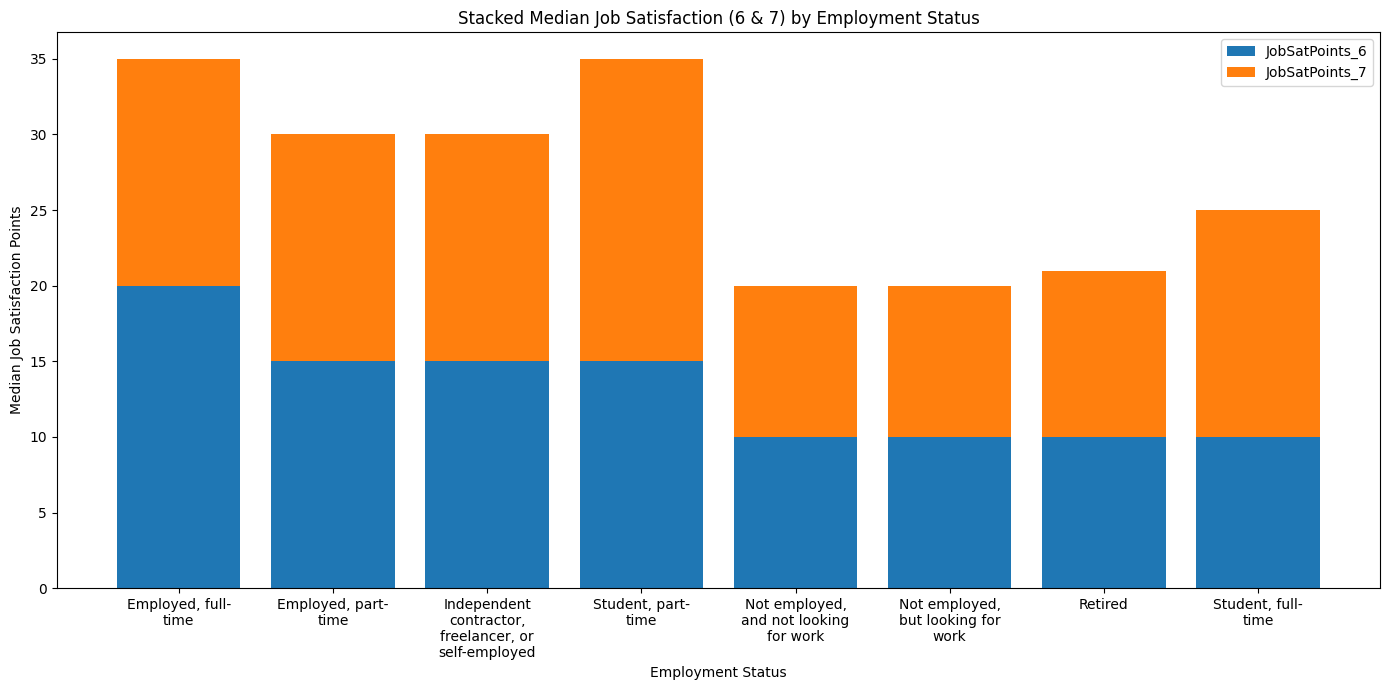

In [15]:
##Write your code here
# --- Task 1.2: Stacked Job Satisfaction by Employment Status ---

# Keep only needed columns and drop rows with no employment info
df_emp = df[["Employment", "JobSatPoints_6", "JobSatPoints_7"]].dropna(subset=["Employment"])

# Explode multi-select employment answers into separate rows
df_emp_exploded = explode_multiselect(df_emp, "Employment")

# Compute median satisfaction per employment type
job_sat_by_emp = df_emp_exploded.groupby("Employment")[["JobSatPoints_6", "JobSatPoints_7"]].median()

# Drop categories that have no satisfaction values at all
job_sat_by_emp = job_sat_by_emp.dropna(how="all")

# Sort for nicer visual flow
job_sat_by_emp = job_sat_by_emp.sort_values("JobSatPoints_6", ascending=False)

# Wrap long labels into multiple lines
import textwrap

labels_wrapped = [
    "\n".join(textwrap.wrap(label, width=15))
    for label in job_sat_by_emp.index
]

plt.figure(figsize=(14, 7))

x = range(len(job_sat_by_emp))

plt.bar(x,
        job_sat_by_emp["JobSatPoints_6"],
        label="JobSatPoints_6")

plt.bar(x,
        job_sat_by_emp["JobSatPoints_7"],
        bottom=job_sat_by_emp["JobSatPoints_6"],
        label="JobSatPoints_7")

plt.xticks(x, labels_wrapped, rotation=0, ha="center")
plt.xlabel("Employment Status")
plt.ylabel("Median Job Satisfaction Points")
plt.title("Stacked Median Job Satisfaction (6 & 7) by Employment Status")
plt.legend()
plt.tight_layout()
plt.show()



### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


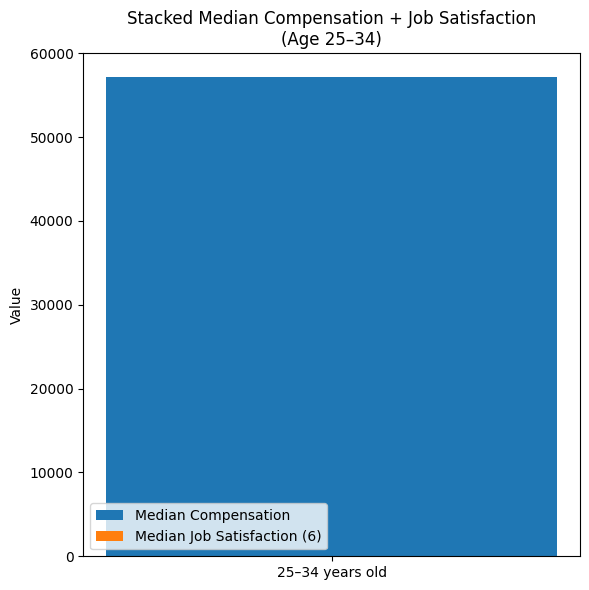

In [27]:
##Write your code here
# --- Task 2.1: Compensation + Job Satisfaction for Age 25–34 ---

# 1. Filter age group
df_2534 = df[df["Age"] == "25-34 years old"].copy()

# 2. Clean compensation outliers
df_2534_clean = clean_compensation(df_2534)

# 3. Compute medians for compensation + job satisfaction
median_comp = df_2534_clean["ConvertedCompYearly"].median()
median_sat = df_2534_clean["JobSatPoints_6"].median()

# Create a small dataframe for visualization
df_task21 = pd.DataFrame({
    "Metric": ["Median Compensation", "Median Job Satisfaction (6)"],
    "Value": [median_comp, median_sat]
})

# 4. Plot stacked bar chart
plt.figure(figsize=(6, 6))

plt.bar(
    ["25–34 years old"],
    [median_comp],
    label="Median Compensation"
)

plt.bar(
    ["25–34 years old"],
    [median_sat],
    bottom=[median_comp],
    label="Median Job Satisfaction (6)"
)

plt.ylabel("Value")
plt.title("Stacked Median Compensation + Job Satisfaction\n(Age 25–34)")
plt.legend()
plt.tight_layout()
plt.show()


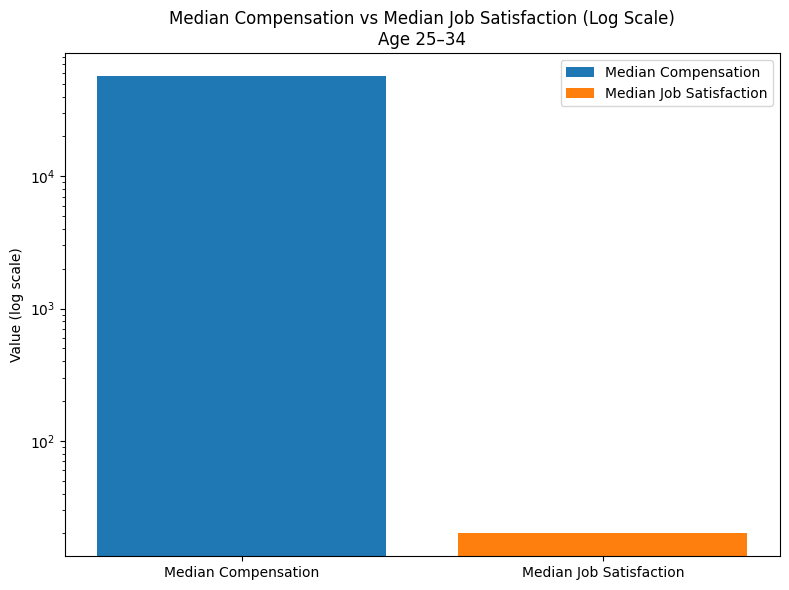

In [28]:
# 4. Plot dual-axis bar chart
plt.figure(figsize=(8,6))

# Plot side-by-side bars on log scale
plt.bar("Median Compensation", median_comp, label="Median Compensation")
plt.bar("Median Job Satisfaction", median_sat, label="Median Job Satisfaction")

plt.yscale("log")  # Log scale FIXES visibility
plt.ylabel("Value (log scale)")
plt.title("Median Compensation vs Median Job Satisfaction (Log Scale)\nAge 25–34")
plt.legend()
plt.tight_layout()
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


/tmp/ipython-input-4229509008.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_comp_age = df_comp_clean.groupby("Age")["ConvertedCompYearly"].median()
/tmp/ipython-input-4229509008.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_sat_age = df_comp_clean.groupby("Age")["JobSatPoints_6"].median()


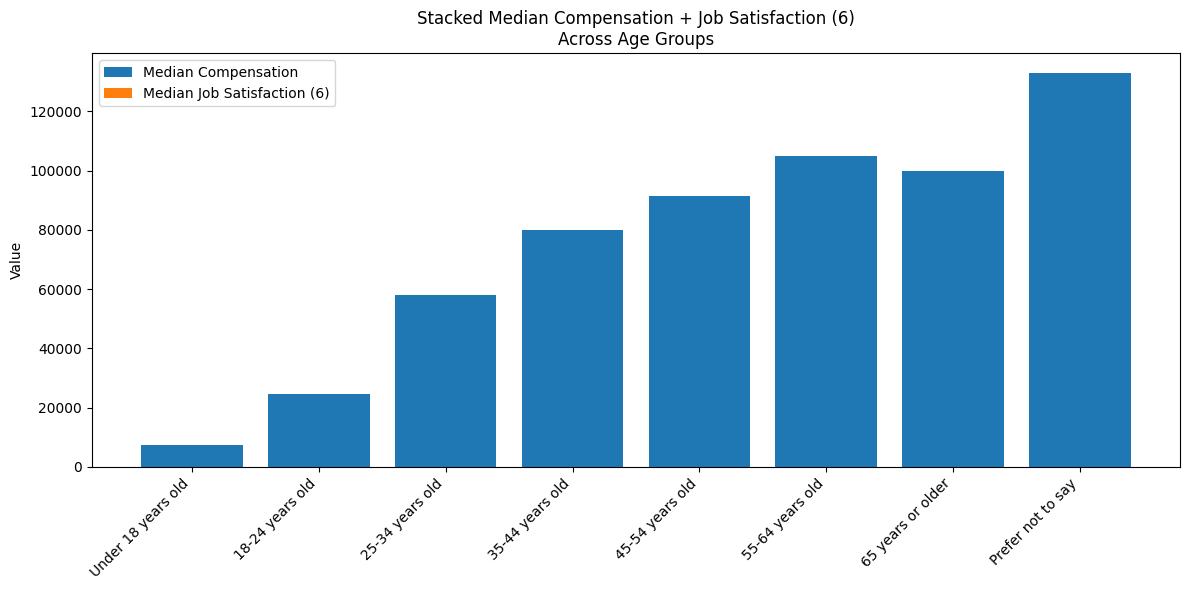

In [32]:
# --- Task 2.2: Stacked Compensation + Satisfaction by Age Group ---

# 1. Clean compensation outliers for entire dataset
df_comp_clean = clean_compensation(order_age_column(df.copy()))

# 2. Compute medians by age
median_comp_age = df_comp_clean.groupby("Age")["ConvertedCompYearly"].median()
median_sat_age = df_comp_clean.groupby("Age")["JobSatPoints_6"].median()

# Align both series to the same ordered age index
median_comp_age = median_comp_age.loc[age_order]
median_sat_age = median_sat_age.loc[age_order]

# Remove age groups with all NaN (if any)
valid = ~(median_comp_age.isna() & median_sat_age.isna())
median_comp_age = median_comp_age[valid]
median_sat_age = median_sat_age[valid]

# 3. Plot stacked chart
plt.figure(figsize=(12, 6))

x = range(len(median_comp_age))

plt.bar(
    x,
    median_comp_age,
    label="Median Compensation"
)

plt.bar(
    x,
    median_sat_age,
    bottom=median_comp_age,
    label="Median Job Satisfaction (6)"
)

plt.xticks(x, median_comp_age.index, rotation=45, ha="right")
plt.ylabel("Value")
plt.title("Stacked Median Compensation + Job Satisfaction (6)\nAcross Age Groups")
plt.legend()
plt.tight_layout()
plt.show()


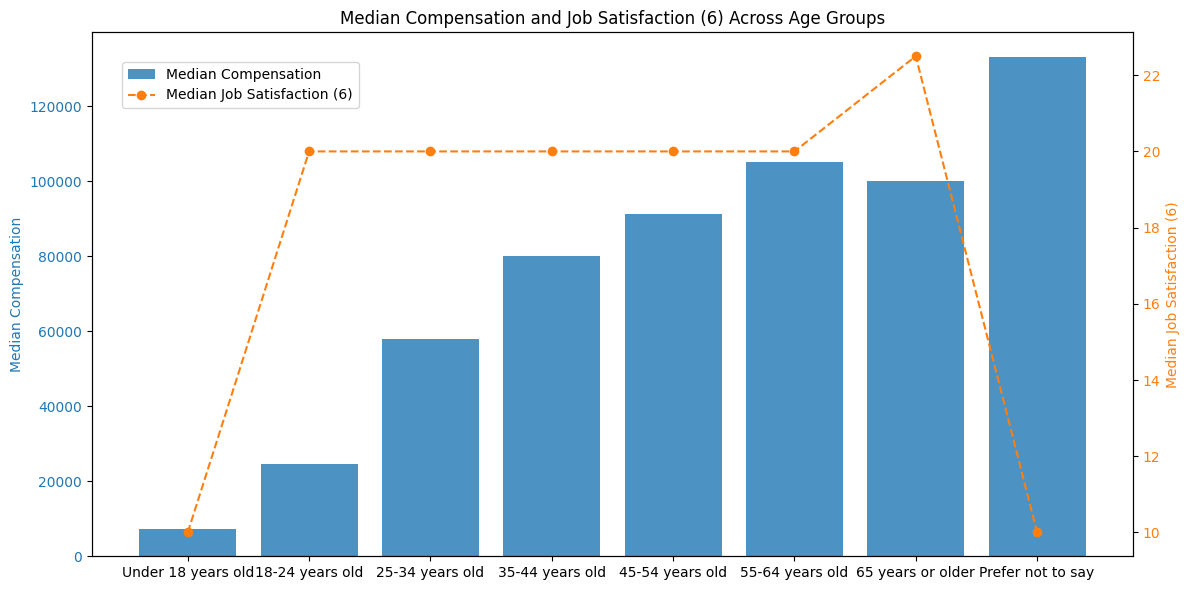

In [33]:
# Better Task 2.2: Compensation (bars) + Job Satisfaction (line) by Age Group

# We reuse the same cleaned data you already computed:
# df_comp_clean, median_comp_age, median_sat_age

fig, ax1 = plt.subplots(figsize=(12, 6))

ages = median_comp_age.index
x = range(len(ages))

# Bars for compensation
ax1.bar(x, median_comp_age, label="Median Compensation", alpha=0.8)
ax1.set_ylabel("Median Compensation", color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")

# Second axis for job satisfaction
ax2 = ax1.twinx()
ax2.plot(x, median_sat_age, marker="o", linestyle="--",
         color="tab:orange", label="Median Job Satisfaction (6)")
ax2.set_ylabel("Median Job Satisfaction (6)", color="tab:orange")
ax2.tick_params(axis='y', labelcolor="tab:orange")

# Shared x-axis labels
plt.xticks(x, ages, rotation=45, ha="right")

plt.title("Median Compensation and Job Satisfaction (6) Across Age Groups")
fig.tight_layout()

# Build a combined legend
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


In [34]:
##Write your code here
# Find columns whose names look related to databases
db_cols = [c for c in df.columns if "database" in c.lower() or "db" in c.lower()]
print("Possible database columns:")
for c in db_cols:
    print("-", c)

print("\nSample values from these columns:\n")
for c in db_cols:
    print(f"--- {c} ---")
    print(df[c].dropna().head(10))
    print()


Possible database columns:
- DatabaseHaveWorkedWith
- DatabaseWantToWorkWith
- DatabaseAdmired

Sample values from these columns:

--- DatabaseHaveWorkedWith ---
1                           Dynamodb;MongoDB;PostgreSQL
2                            Firebase Realtime Database
3                       MongoDB;MySQL;PostgreSQL;SQLite
4                                     PostgreSQL;SQLite
5                                       Cloud Firestore
7                                              Supabase
9                        MongoDB;MySQL;PostgreSQL;Redis
10              Elasticsearch;MongoDB;PostgreSQL;SQLite
11    Microsoft Access;Microsoft SQL Server;PostgreS...
12                                                MySQL
Name: DatabaseHaveWorkedWith, dtype: object

--- DatabaseWantToWorkWith ---
1                                  PostgreSQL
2                  Firebase Realtime Database
3                    MongoDB;MySQL;PostgreSQL
4                           PostgreSQL;SQLite
5                 

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


/tmp/ipython-input-230712970.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  db_counts = df_db.groupby(['Age', 'DatabaseWantToWorkWith']).size().reset_index(name='Count')


<Figure size 1400x1000 with 0 Axes>

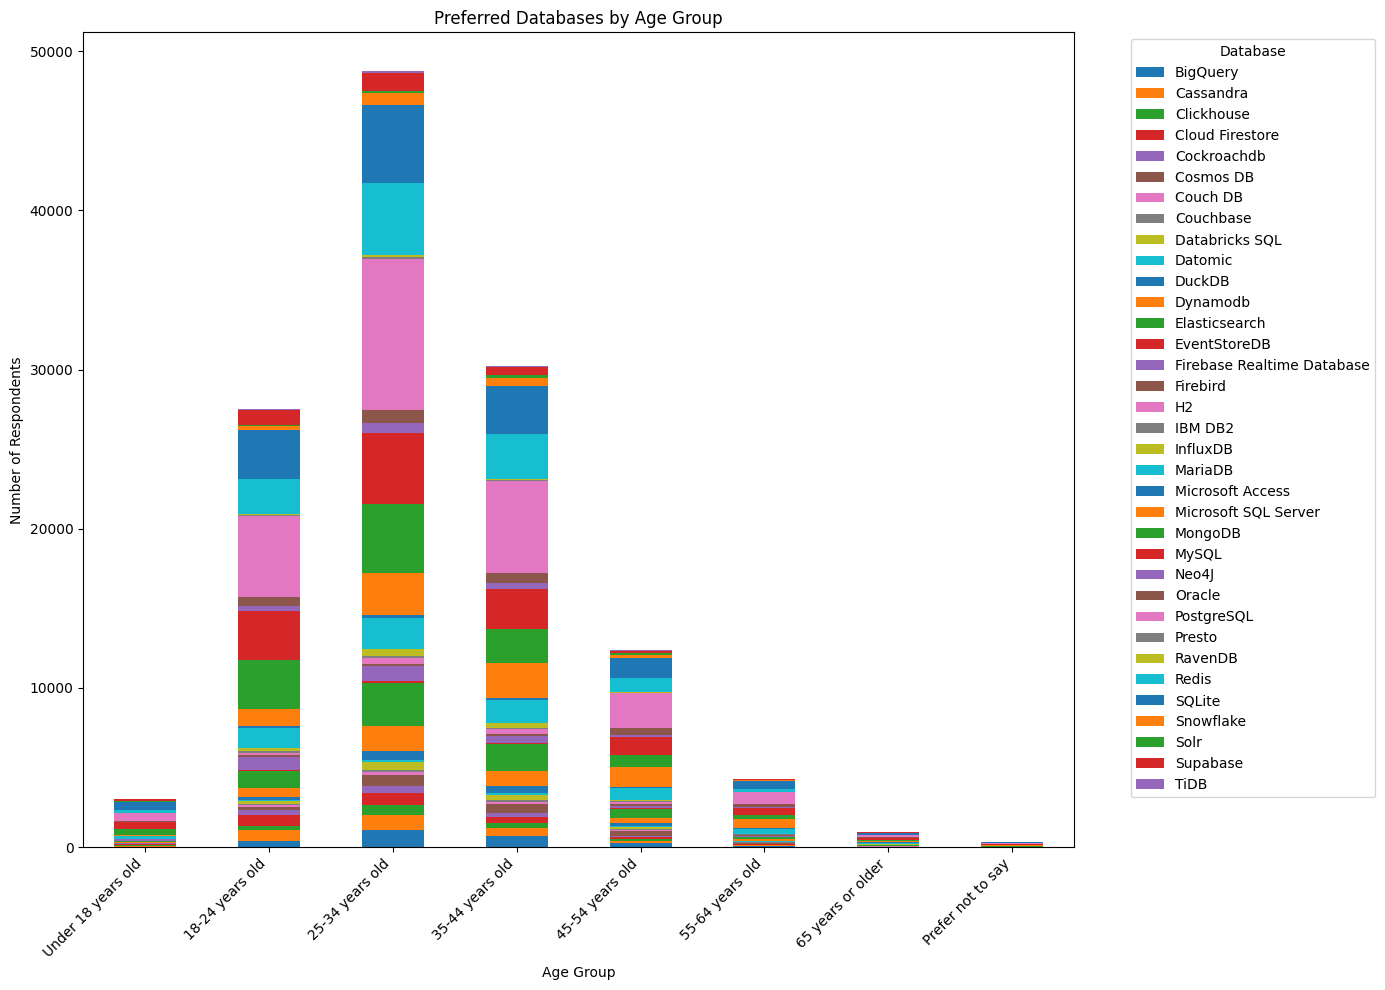

In [39]:
# --- Task 3.1: Preferred Databases by Age Group ---

# Make sure Age is ordered
df_age = order_age_column(df.copy())

# 1. Keep only age + database preference column
df_db = df_age[['Age', 'DatabaseWantToWorkWith']].dropna()

# 2. Explode multi-select database column
df_db = explode_multiselect(df_db, 'DatabaseWantToWorkWith')

# 3. Count how many people in each age group selected each database
db_counts = df_db.groupby(['Age', 'DatabaseWantToWorkWith']).size().reset_index(name='Count')

# 4. Pivot to wide format for stacked bar chart
db_pivot = db_counts.pivot(index='Age', columns='DatabaseWantToWorkWith', values='Count').fillna(0)

# 5. Keep only age categories that actually exist
db_pivot = db_pivot.loc[age_order].dropna(how='all')

# 6. Plot stacked bar chart
plt.figure(figsize=(14, 10))

db_pivot.plot(kind='bar', stacked=True, figsize=(14, 10))

plt.title("Preferred Databases by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Database", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipython-input-3084366700.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  db_counts = df_db.groupby(['DatabaseWantToWorkWith', 'Age']).size().reset_index(name='Count')


<Figure size 1600x800 with 0 Axes>

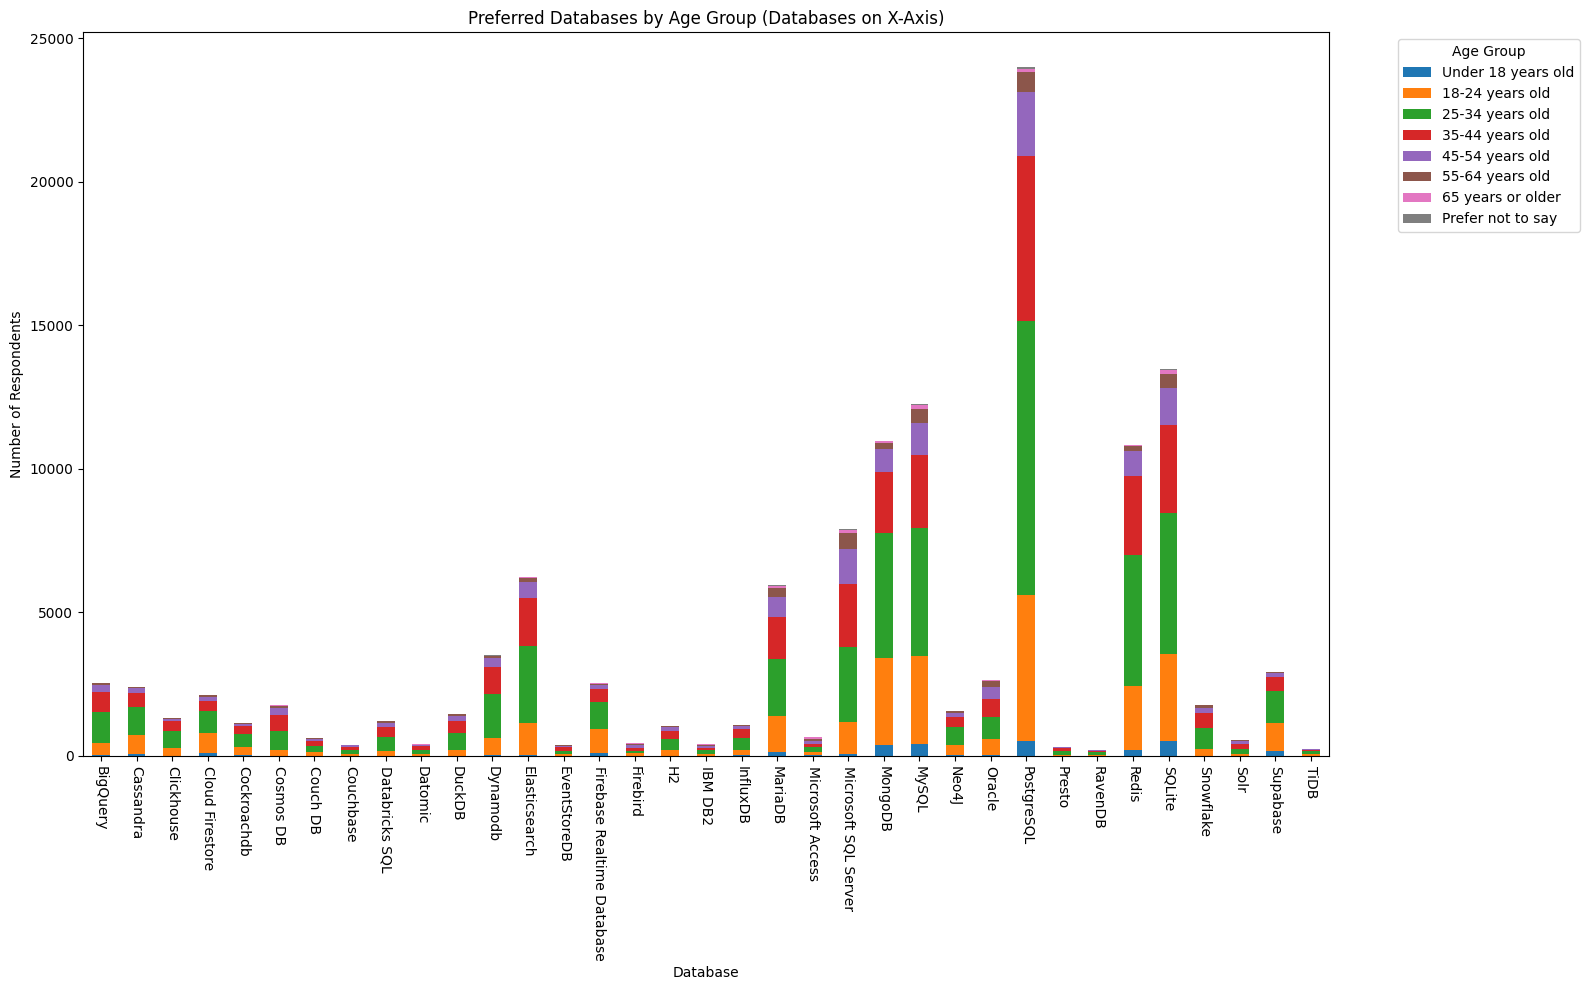

In [48]:
# --- Task 3.1: Preferred Databases by Age Group (FLIPPED AXIS VERSION) ---

# Make sure Age is ordered
df_age = order_age_column(df.copy())

# 1. Keep only age + database preference column
df_db = df_age[['Age', 'DatabaseWantToWorkWith']].dropna()

# 2. Explode multi-select database column
df_db = explode_multiselect(df_db, 'DatabaseWantToWorkWith')

# 3. Count selections
db_counts = df_db.groupby(['DatabaseWantToWorkWith', 'Age']).size().reset_index(name='Count')

# 4. Pivot so that databases are rows and ages are columns
db_pivot2 = db_counts.pivot(index='DatabaseWantToWorkWith', columns='Age', values='Count').fillna(0)

# 5. Drop databases that have extremely low counts (optional)
# db_pivot2 = db_pivot2[db_pivot2.sum(axis=1) > 50]  # uncomment if needed

# 6. Plot: databases on x-axis, age groups stacked
plt.figure(figsize=(16, 8))
db_pivot2.plot(kind='bar', stacked=True, figsize=(16, 10))

plt.title("Preferred Databases by Age Group (Databases on X-Axis)")
plt.xlabel("Database")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=-90)
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


<Figure size 1600x800 with 0 Axes>

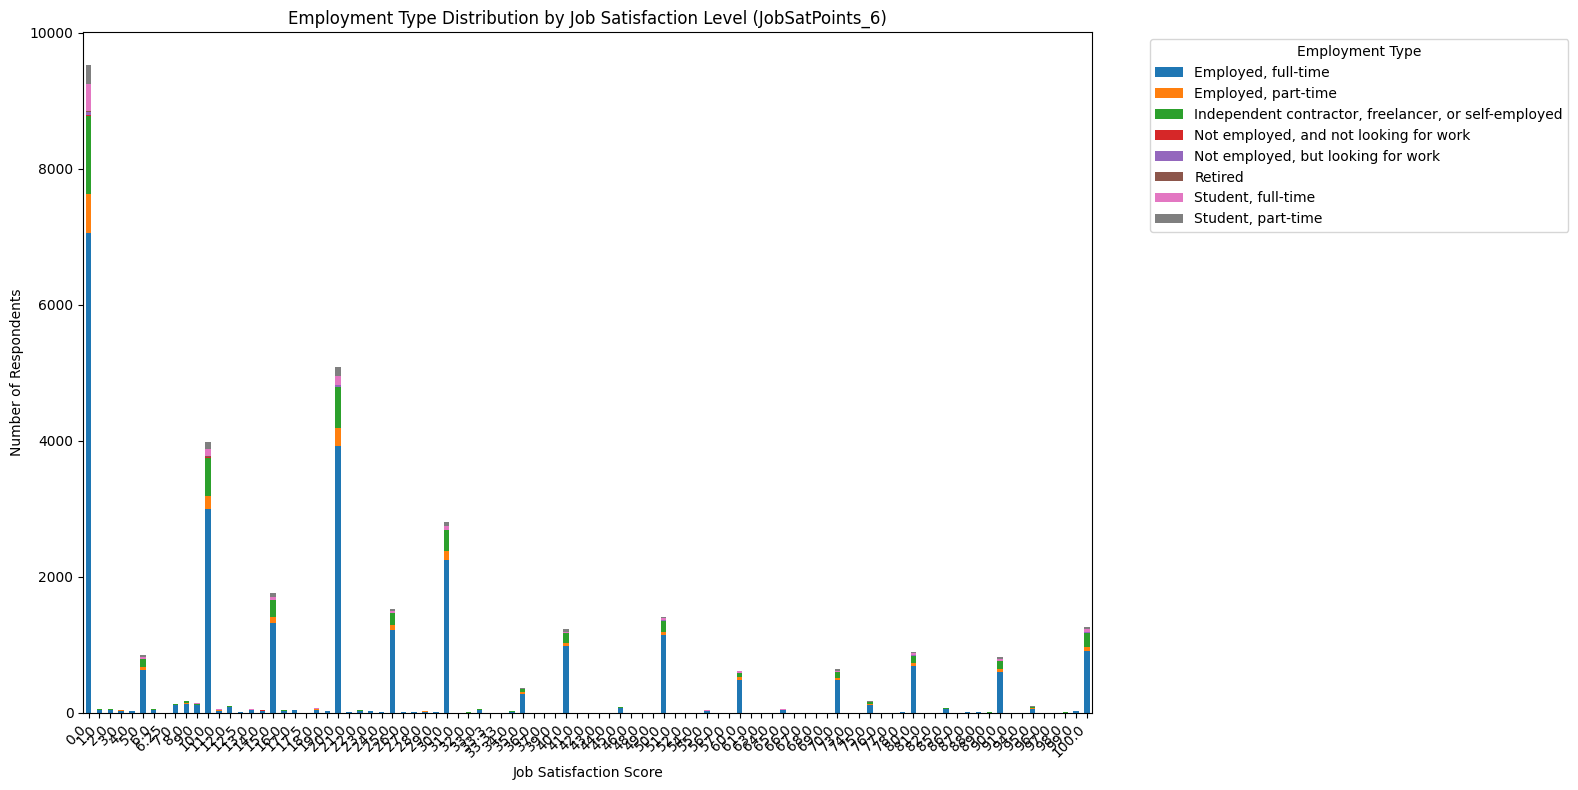

In [50]:
# --- Task 3.2: Stacked Employment Type Distribution by Job Satisfaction ---

# 1. Keep employment + job satisfaction
df_emp_sat = df[['Employment', 'JobSatPoints_6']].dropna()

# 2. Explode multi-select employment column
df_emp_sat = explode_multiselect(df_emp_sat, 'Employment')

# 3. Group: count employees per satisfaction value
emp_sat_counts = df_emp_sat.groupby(['JobSatPoints_6', 'Employment']).size().reset_index(name='Count')

# 4. Pivot to wide format
emp_sat_pivot = emp_sat_counts.pivot(index='JobSatPoints_6',
                                     columns='Employment',
                                     values='Count').fillna(0)

# 5. Sort satisfaction values (helps the x-axis look nicer)
emp_sat_pivot = emp_sat_pivot.sort_index()

# 6. Plot stacked chart
plt.figure(figsize=(16, 8))

emp_sat_pivot.plot(kind='bar', stacked=True, figsize=(16, 8))

plt.title("Employment Type Distribution by Job Satisfaction Level (JobSatPoints_6)")
plt.xlabel("Job Satisfaction Score")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipython-input-1842933016.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emp_sat_bins = df_emp_sat.groupby(['SatBin', 'Employment']).size().reset_index(name='Count')


<Figure size 1600x800 with 0 Axes>

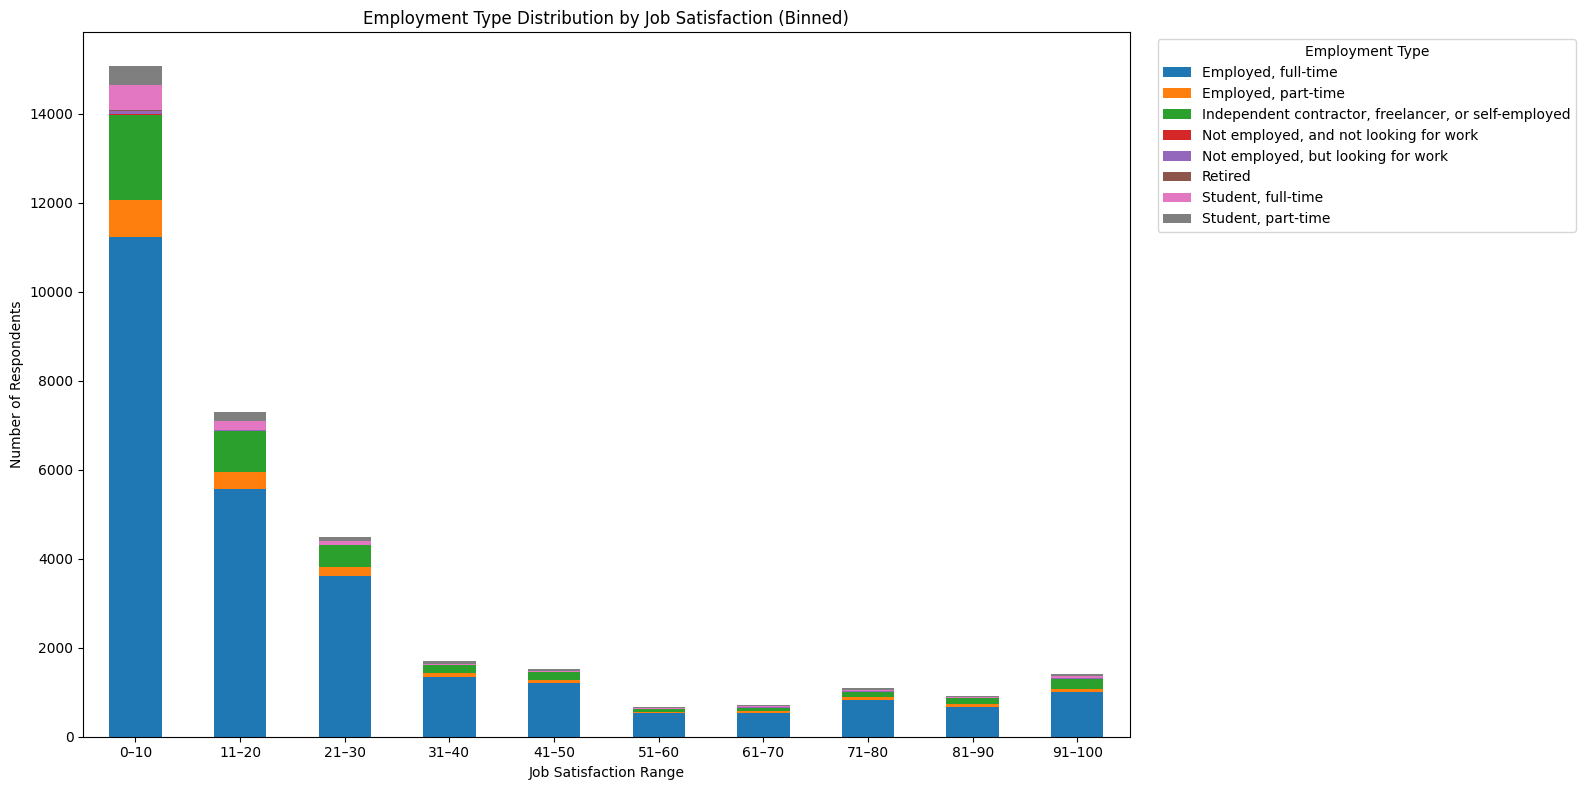

In [51]:
# --- Task 3.2 (Improved): Grouped Job Satisfaction Bins ---

# 1. Keep employment + satisfaction
df_emp_sat = df[['Employment', 'JobSatPoints_6']].dropna()

# 2. Explode multi-select Employment
df_emp_sat = explode_multiselect(df_emp_sat, 'Employment')

# 3. Create satisfaction bins
bins = [0,10,20,30,40,50,60,70,80,90,100]
labels = ["0–10","11–20","21–30","31–40","41–50","51–60","61–70","71–80","81–90","91–100"]

df_emp_sat["SatBin"] = pd.cut(df_emp_sat["JobSatPoints_6"],
                              bins=bins,
                              labels=labels,
                              include_lowest=True)

# 4. Group counts
emp_sat_bins = df_emp_sat.groupby(['SatBin', 'Employment']).size().reset_index(name='Count')

# 5. Pivot for stacked chart
emp_sat_pivot2 = emp_sat_bins.pivot(index='SatBin',
                                    columns='Employment',
                                    values='Count').fillna(0)

# 6. Plot stacked bar chart
plt.figure(figsize=(16, 8))

emp_sat_pivot2.plot(kind='bar', stacked=True, figsize=(16, 8))

plt.title("Employment Type Distribution by Job Satisfaction (Binned)")
plt.xlabel("Job Satisfaction Range")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=0)
plt.legend(title="Employment Type", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


/tmp/ipython-input-3965157252.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['LanguageAdmired', 'Age'])


<Figure size 1600x800 with 0 Axes>

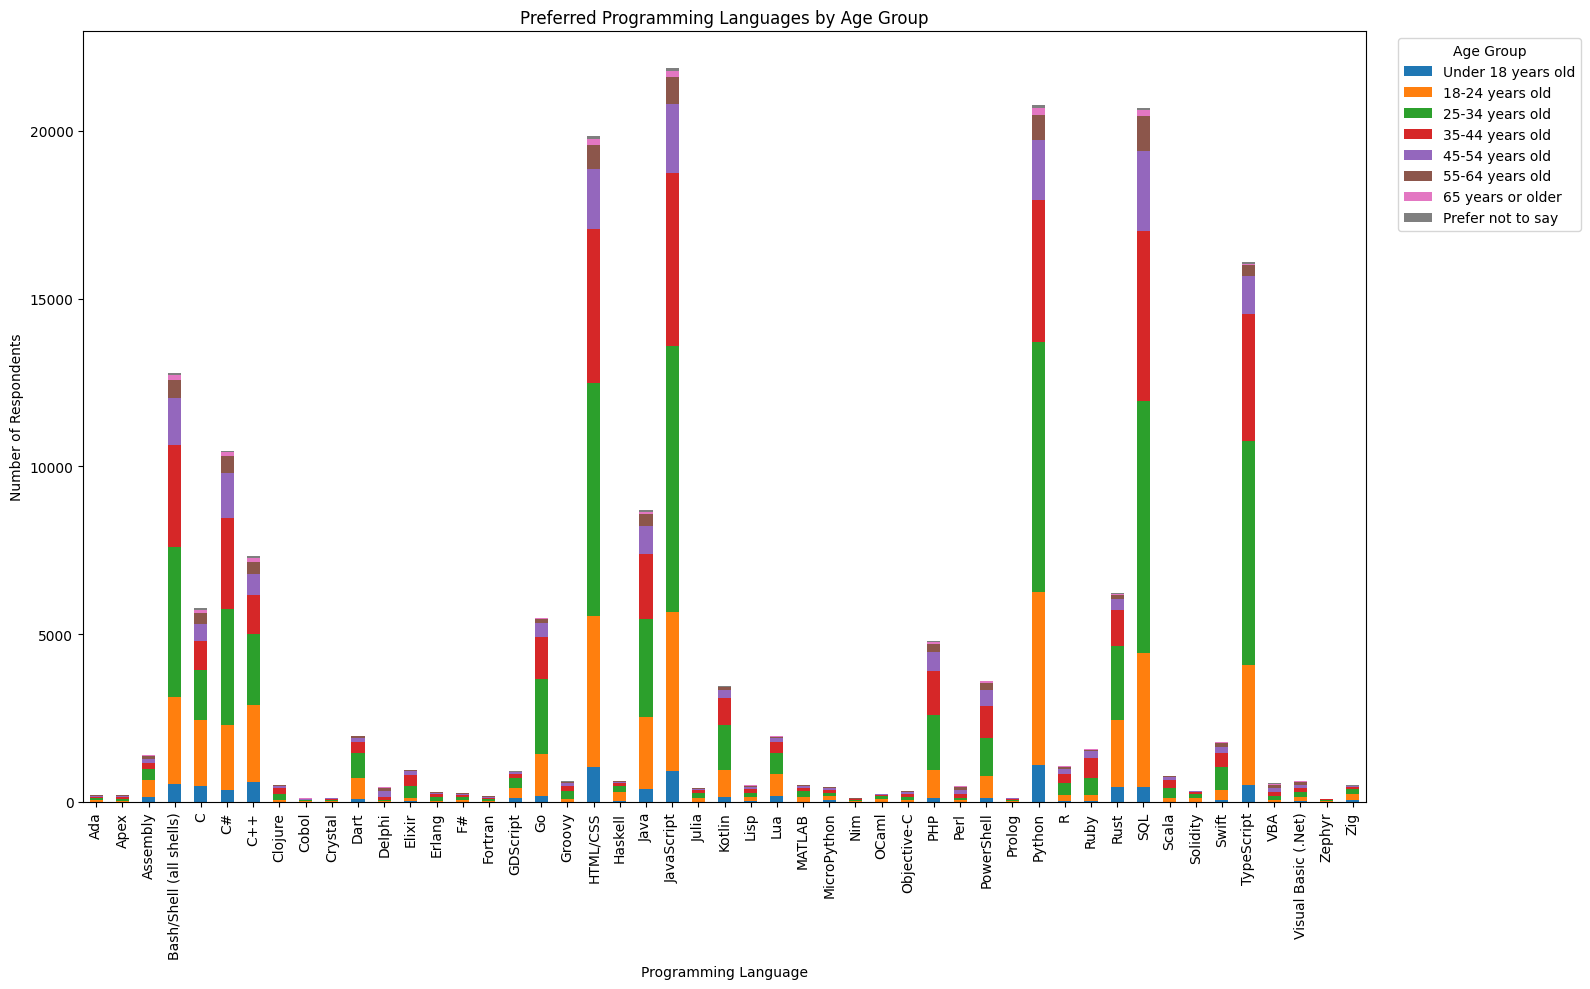

In [54]:
##Write your code here
# --- Task 4.1: Preferred Programming Languages by Age Group (Languages on X-axis) ---

# Ensure Age is ordered
df_age = order_age_column(df.copy())

# 1. Keep only Age + LanguageAdmired
df_lang = df_age[['Age', 'LanguageAdmired']].dropna()

# 2. Explode multi-select LanguageAdmired
df_lang = explode_multiselect(df_lang, 'LanguageAdmired')

# 3. Count how many times each Age group admires each language
lang_counts = (
    df_lang
    .groupby(['LanguageAdmired', 'Age'])
    .size()
    .reset_index(name='Count')
)

# 4. Pivot: rows = Language, columns = Age
lang_pivot = (
    lang_counts
    .pivot(index='LanguageAdmired', columns='Age', values='Count')
    .fillna(0)
)

# OPTIONAL: limit to top N languages (uncomment if chart is too crowded)
# lang_pivot['Total'] = lang_pivot.sum(axis=1)
# lang_pivot = lang_pivot.sort_values('Total', ascending=False).head(15)
# lang_pivot = lang_pivot.drop(columns='Total')

# 5. Plot stacked bar
plt.figure(figsize=(16, 8))
lang_pivot.plot(kind='bar', stacked=True, figsize=(16, 10))

plt.title("Preferred Programming Languages by Age Group")
plt.xlabel("Programming Language")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=90)
plt.legend(title="Age Group", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


<Figure size 1600x800 with 0 Axes>

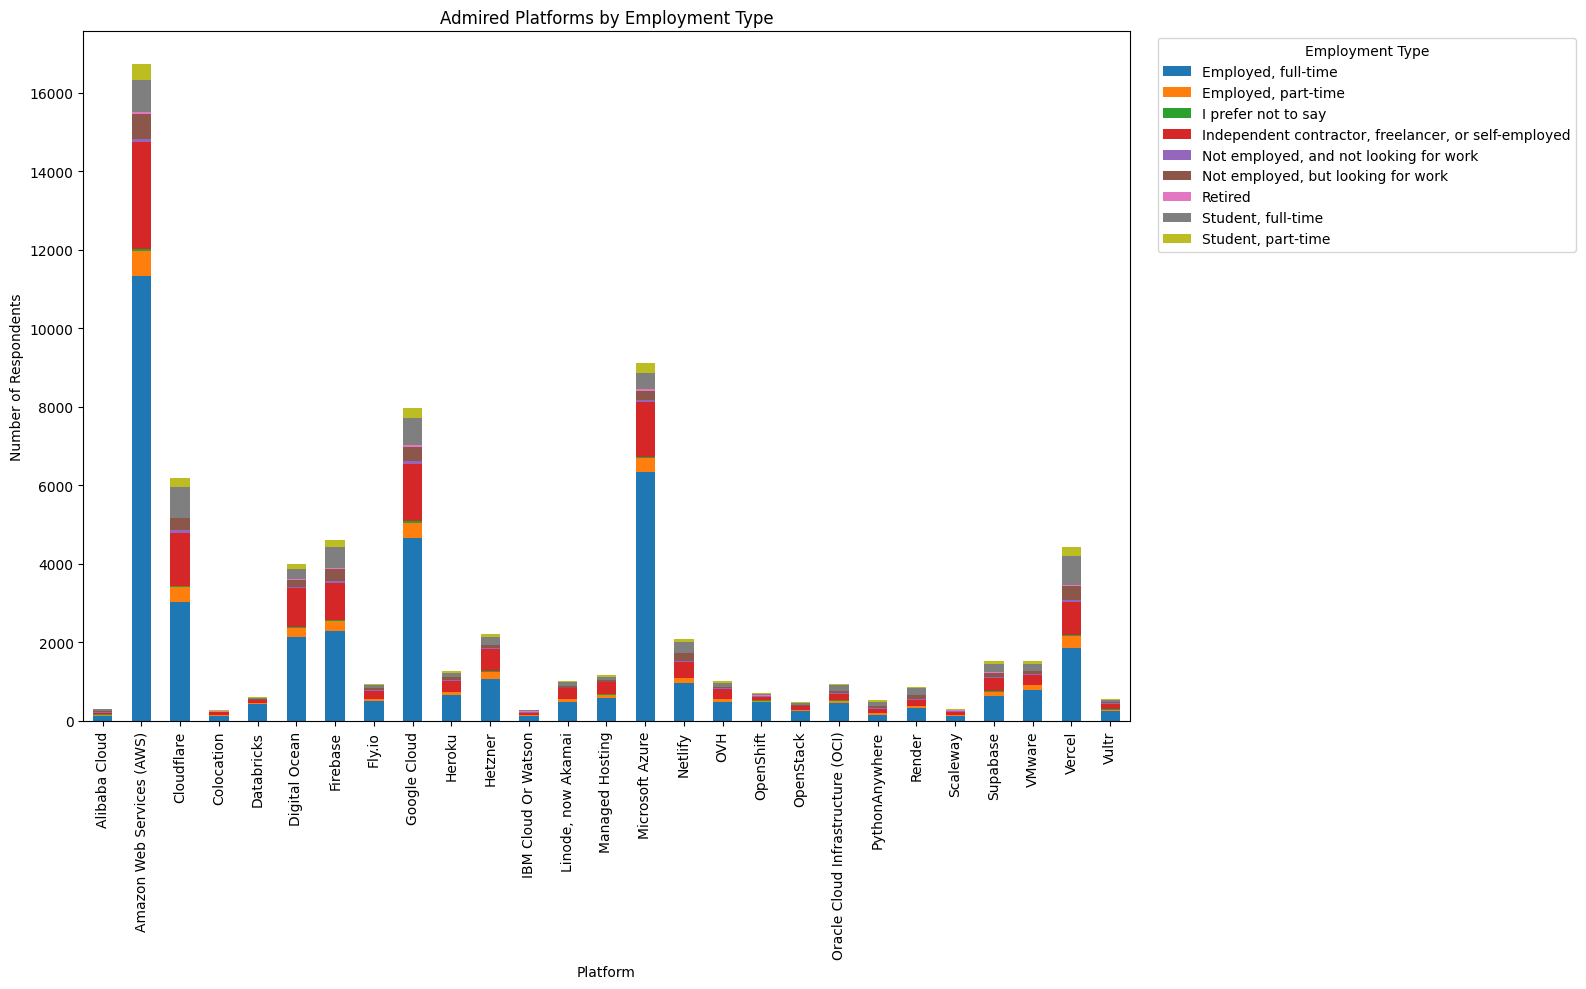

In [56]:
##Write your code here
# --- Task 4.2: Admired Platforms by Employment Type (Platforms on X-axis) ---

# 1. Keep Employment + PlatformAdmired and drop missing
df_plat = df[['Employment', 'PlatformAdmired']].dropna()

# 2. Explode multi-select Employment
df_plat = explode_multiselect(df_plat, 'Employment')

# 3. Explode multi-select PlatformAdmired
df_plat = explode_multiselect(df_plat, 'PlatformAdmired')

# 4. Group: count how many employees of each type admire each platform
plat_counts = (
    df_plat
    .groupby(['PlatformAdmired', 'Employment'])
    .size()
    .reset_index(name='Count')
)

# 5. Pivot: rows = Platform, columns = Employment types
plat_pivot = (
    plat_counts
    .pivot(index='PlatformAdmired', columns='Employment', values='Count')
    .fillna(0)
)

# OPTIONAL: keep only top N platforms for readability
# plat_pivot['Total'] = plat_pivot.sum(axis=1)
# plat_pivot = plat_pivot.sort_values('Total', ascending=False).head(15)
# plat_pivot = plat_pivot.drop(columns='Total')

# 6. Plot stacked bar
plt.figure(figsize=(16, 8))
plat_pivot.plot(kind='bar', stacked=True, figsize=(16, 10))

plt.title("Admired Platforms by Employment Type")
plt.xlabel("Platform")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=90)
plt.legend(title="Employment Type", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


#**PERSONAL INSIGHTS**
##**Summary & Insights (Stacked Charts)**

The stacked charts in this lab helped visualize composition within categories and compare how different demographic or professional groups contribute to overall patterns.

**Job Satisfaction:**

When job satisfaction scores were stacked by both age and employment type, we saw that most respondents across all ages cluster around similar satisfaction levels (generally in the 20–30 range). Full-time employees represented the largest share across almost every satisfaction bin, followed by part-time employees and students. Binning satisfaction values was essential to make the chart readable since satisfaction is reported on a continuous 0–100 scale.

**Compensation vs Satisfaction:**

Compensation and satisfaction have dramatically different scales, so compensation dominated the stacked charts. Even after cleaning outliers, compensation values remained tens of thousands higher than satisfaction scores, which made the stacked bars visually unbalanced. A dual-axis chart was more effective for comparing these variables while preserving meaning.

**Database Preferences:**

When visualized with databases on the x-axis, age-based stacks clearly showed that database interest is highest among respondents aged 18–44, with peaks around PostgreSQL, MySQL, MongoDB, and SQLite. Younger age groups consistently made up the largest share of interest in most databases, reflecting global trends in early-career learning priorities.

**Programming Languages:**

Flipping the axes to place languages on the x-axis revealed clear popularity patterns. JavaScript, Python, HTML/CSS, SQL, TypeScript, and Java were the most admired languages across nearly all age groups, with respondents aged 18–34 representing the largest share. Older age groups appeared in smaller but steady proportions, showing broad, multi-generational language adoption.

**Platform Preferences:**

Similarly, placing platforms on the x-axis made it easy to see that AWS, Azure, and Google Cloud dominate respondent interest. Full-time employed respondents make up the overwhelming majority of admiration across almost all platforms, while students and part-time workers appear consistently but in smaller proportions. This reflects real-world workforce tool adoption patterns.

##**Overall:**

Stacked charts allowed us to compare distributions, not just totals. By exploding multi-select fields, grouping, pivoting, and stacking the resulting counts, we revealed underlying patterns in technology preferences, job satisfaction, and compensation across demographic categories. These visualizations highlighted how different groups contribute to overall trends and provided more context than simple aggregates alone.

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
